<a href="https://colab.research.google.com/github/sachsac/Im-Going-to-Disney-World/blob/main/Project_2_Parts_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data supplied by Lynne Passanisi on [data.world](https://data.world/lynne588/walt-disney-world-ride-data). 

Dictionary as follows:

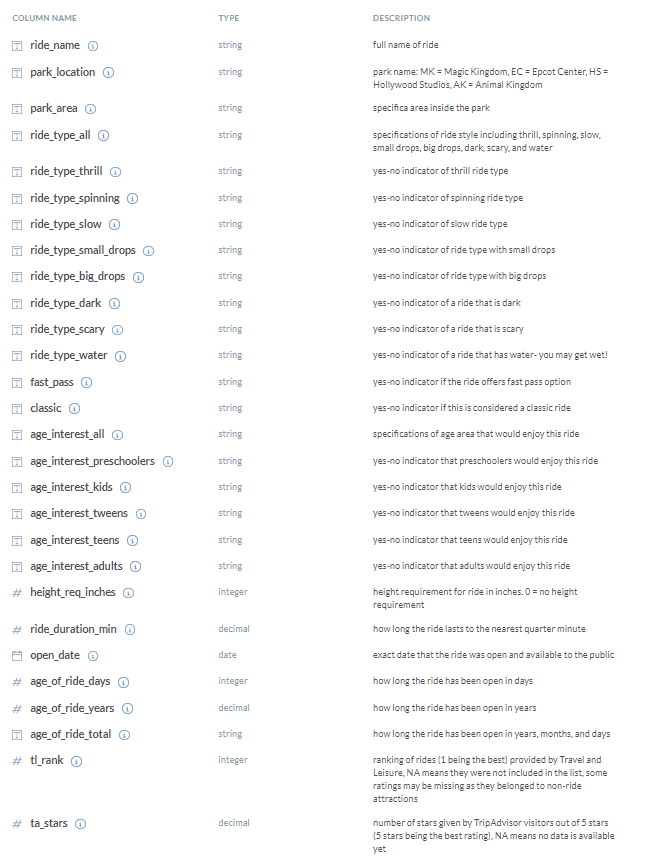


#Imports and upload data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/WDW_Ride_Data_DW.xlsx')
df

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.50,2018-06-30,480,1.314168,1 years 3 months 24 days,31.0,NaN
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,No,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,1.50,1995-02-25,9006,24.657084,24 years 7 months 27 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,44,5.00,2017-05-27,879,2.406571,2 years 4 months 28 days,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,No,No,Yes,Yes,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,40,3.50,1980-09-23,14274,39.080082,39 years 0 months 29 days,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,0,4.00,1998-10-07,7686,21.043121,21 years 0 months 15 days,32.0,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,40,3.25,1998-04-22,7854,21.503080,21 years 6 months 2 days,24.0,4.0
6,Dumbo the Flying Elephant,MK,Fantasyland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,Yes,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,1.50,1971-10-01,17554,48.060233,48 years 0 months 22 days,29.0,4.5
7,Expedition Everest,AK,Asia,"thrill, big drops, dark",Yes,No,No,No,Yes,Yes,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,44,2.75,2006-04-07,4947,13.544148,13 years 6 months 17 days,1.0,5.0
8,Frozen Ever After,EC,World Showcase,"slow, small drops, dark",No,No,Yes,Yes,No,Yes,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,0,5.00,2016-06-21,1219,3.337440,3 years 4 months 3 days,27.0,4.0
9,Gran Fiesta Tour Starring The Three Caballeros,EC,World Showcase,slow,No,No,Yes,No,No,No,No,No,No,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,8.00,2007-04-02,4587,12.558522,12 years 6 months 22 days,47.0,4.0


In [ ]:
df.info() #TL Rank should be an int not float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Ride_name                  46 non-null     object        
 1   Park_location              46 non-null     object        
 2   Park_area                  46 non-null     object        
 3   Ride_type_all              46 non-null     object        
 4   Ride_type_thrill           46 non-null     object        
 5   Ride_type_spinning         46 non-null     object        
 6   Ride_type_slow             46 non-null     object        
 7   Ride_type_small_drops      46 non-null     object        
 8   Ride_type_big_drops        46 non-null     object        
 9   Ride_type_dark             46 non-null     object        
 10  Ride_type_scary            46 non-null     object        
 11  Ride_type_water            46 non-null     object        
 12  Fast_pass 

#Data Cleaning

## Nulls

In [ ]:
df.isnull().sum()
#two nulls in the TL_rank and TA_stars, these mean they haven't been yet rated. These columns are not necessary for our goals so I choose to drop the columns in the next code

Ride_name                    0
Park_location                0
Park_area                    0
Ride_type_all                0
Ride_type_thrill             0
Ride_type_spinning           0
Ride_type_slow               0
Ride_type_small_drops        0
Ride_type_big_drops          0
Ride_type_dark               0
Ride_type_scary              0
Ride_type_water              0
Fast_pass                    0
Classic                      0
Age_interest_all             0
Age_interest_preschoolers    0
Age_interest_kids            0
Age_interest_tweens          0
Age_interest_teens           0
Age_interest_adults          0
Height_req_inches            0
Ride_duration_min            0
Open_date                    0
Age_of_ride_days             0
Age_of_ride_years            0
Age_of_ride_total            0
TL_rank                      2
TA_Stars                     2
dtype: int64

In [ ]:
#the rides with nulls in TA_Stars
df[df['TA_Stars'].isna()]

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.5,2018-06-30,480,1.314168,1 years 3 months 24 days,31.0,NaN
27,Slinky Dog Dash,HS,Toy Story Land,"thrill, small drops",Yes,No,No,Yes,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,38,2.0,2018-06-30,480,1.314168,1 years 3 months 24 days,14.0,NaN


In [ ]:
df[df.Ride_name == 'Alien Swirling Saucers'].fillna(4.0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#found that Slinky Dog Dash is now rated on https://www.tripadvisor.com/Attraction_Review-g34515-d17523143-Reviews-Slinky_Dog_Dash-Orlando_Florida.html; it is 4.5 stars
df[df.Ride_name == 'Slinky Dog Dash'].fillna(4.5, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#rides in TL_Rank that are null
df[df['TL_rank'].isna()]
#with some research, these rides are no longer available at Disney World, so I opt to drop them since they are not current attractions

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
18,Main Street Vehicles,MK,Main Street USA,slow,No,No,Yes,No,No,No,No,No,No,No,all ages,Yes,Yes,Yes,Yes,Yes,0,3.0,1971-10-01,17554,48.060233,48 years 0 months 22 days,NaN,4.5
45,Wildlife Express Train,AK,Africa,slow,No,No,Yes,No,No,No,No,No,No,No,all ages,Yes,Yes,Yes,Yes,Yes,0,12.0,1998-04-22,7854,21.503080,21 years 6 months 2 days,NaN,3.5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()
#all nulls have been dealt with now

Ride_name                    0
Park_location                0
Park_area                    0
Ride_type_all                0
Ride_type_thrill             0
Ride_type_spinning           0
Ride_type_slow               0
Ride_type_small_drops        0
Ride_type_big_drops          0
Ride_type_dark               0
Ride_type_scary              0
Ride_type_water              0
Fast_pass                    0
Classic                      0
Age_interest_all             0
Age_interest_preschoolers    0
Age_interest_kids            0
Age_interest_tweens          0
Age_interest_teens           0
Age_interest_adults          0
Height_req_inches            0
Ride_duration_min            0
Open_date                    0
Age_of_ride_days             0
Age_of_ride_years            0
Age_of_ride_total            0
TL_rank                      0
TA_Stars                     0
dtype: int64

## Duplicates

In [ ]:
#check for duplicates
df.duplicated().any()
#no duplicates

False

## Correcting Dtypes

In [ ]:
df['TL_rank'].sort_values()
#these are floats but should be integers

7      1.0
10     2.0
37     3.0
28     4.0
29     5.0
40     6.0
31     7.0
3      8.0
2      9.0
26    10.0
15    11.0
22    12.0
25    13.0
32    15.0
11    16.0
21    18.0
13    19.0
17    20.0
14    21.0
30    22.0
33    23.0
5     24.0
20    25.0
8     27.0
36    28.0
6     29.0
39    30.0
4     32.0
19    33.0
42    34.0
34    36.0
38    38.0
23    41.0
16    42.0
1     43.0
35    44.0
41    45.0
9     47.0
43    48.0
24    51.0
44    52.0
12    53.0
Name: TL_rank, dtype: float64

In [ ]:
#converting TL_rank to integers
df['TL_rank'] = df['TL_rank'].astype(int)

## Syntax
checking for spelling errors and continuity in each columns

In [ ]:
df['Park_location'].value_counts()

MK    22
EC     8
AK     8
HS     4
Name: Park_location, dtype: int64

In [ ]:
df['Park_area'].value_counts()

Fantasyland         9
Tomorrowland        6
Future World        6
Adventureland       3
Dinoland USA        3
World Showcase      2
Asia                2
Pandora             2
Frontierland        2
Sunset Boulevard    2
Main Street USA     1
Liberty Square      1
Africa              1
Toy Story Land      1
Echo Lake           1
Name: Park_area, dtype: int64

In [ ]:
df['Ride_type_all'].value_counts()
#we have a typo at "thirll, small drops"

slow                                    12
spinning, slow                           3
slow, dark                               3
slow, spinning                           3
small drops                              2
thrill, small drops                      2
slow, small drops, dark                  2
spinning                                 2
thrill, big drops, dark                  2
slow, small drops                        2
thrill, small drops, spinning            1
thrill, big drops, dark, scary           1
thrill, small drops, dark, scary         1
thrill, big drops                        1
thrill, water, big drops                 1
thrill, water, small drops, spinning     1
thrill                                   1
thirll, small drops                      1
thrill, spinning, dark                   1
Name: Ride_type_all, dtype: int64

In [ ]:
#fixing typo
df['Ride_type_all'] = df['Ride_type_all'].replace('thirll, small drops', 'thrill, small drops')
#check to make sure it was fixed
df['Ride_type_all'].value_counts()

slow                                    12
slow, spinning                           3
spinning, slow                           3
thrill, small drops                      3
slow, dark                               3
slow, small drops                        2
thrill, big drops, dark                  2
spinning                                 2
small drops                              2
slow, small drops, dark                  2
thrill, small drops, dark, scary         1
thrill, big drops                        1
thrill, big drops, dark, scary           1
thrill, small drops, spinning            1
thrill, water, small drops, spinning     1
thrill                                   1
thrill, water, big drops                 1
thrill, spinning, dark                   1
Name: Ride_type_all, dtype: int64

In [ ]:
df['Age_interest_all'].value_counts()
#no typos

all ages                       26
kids, tweens, teens, adults    15
preschoolers, kids              1
Name: Age_interest_all, dtype: int64

## Changing categorical columns to binary 
all yes and nos will be changed to zeroes and ones for later machine learning for our categorical columns.

In [ ]:
df['Ride_type_thrill'].value_counts()

No     29
Yes    13
Name: Ride_type_thrill, dtype: int64

In [ ]:
df['Ride_type_thrill'] = df['Ride_type_thrill'].replace({'No': 0, 'Yes':1})
df['Ride_type_thrill'].value_counts()

0    29
1    13
Name: Ride_type_thrill, dtype: int64

In [ ]:
df['Ride_type_spinning'] = df['Ride_type_spinning'].replace({'No': 0, 'Yes':1})
df['Ride_type_spinning'].value_counts()

0    31
1    11
Name: Ride_type_spinning, dtype: int64

In [ ]:
df['Ride_type_slow'] = df['Ride_type_slow'].replace({'No': 0, 'Yes':1})
df['Ride_type_slow'].value_counts()

1    25
0    17
Name: Ride_type_slow, dtype: int64

In [ ]:
df['Ride_type_small_drops'] = df['Ride_type_small_drops'].replace({'No': 0, 'Yes':1})
df['Ride_type_small_drops'].value_counts()

0    30
1    12
Name: Ride_type_small_drops, dtype: int64

In [ ]:
df['Ride_type_big_drops'] = df['Ride_type_big_drops'].replace({'No': 0, 'Yes':1})
df['Ride_type_big_drops'].value_counts()

0    37
1     5
Name: Ride_type_big_drops, dtype: int64

In [ ]:
df['Ride_type_dark'] = df['Ride_type_dark'].replace({'No': 0, 'Yes':1})
df['Ride_type_dark'].value_counts()

0    32
1    10
Name: Ride_type_dark, dtype: int64

In [ ]:
df['Ride_type_scary'] = df['Ride_type_scary'].replace({'No': 0, 'Yes':1})
df['Ride_type_scary'].value_counts()

0    40
1     2
Name: Ride_type_scary, dtype: int64

In [ ]:
df['Ride_type_water'] = df['Ride_type_water'].replace({'No': 0, 'Yes':1})
df['Ride_type_water'].value_counts()

0    40
1     2
Name: Ride_type_water, dtype: int64

In [ ]:
df['Fast_pass'] = df['Fast_pass'].replace({'No': 0, 'Yes':1})
df['Fast_pass'].value_counts()

1    34
0     8
Name: Fast_pass, dtype: int64

In [ ]:
df['Classic'] = df['Classic'].replace({'No': 0, 'Yes':1})
df['Classic'].value_counts()

0    28
1    14
Name: Classic, dtype: int64

In [ ]:
df['Age_interest_preschoolers'] = df['Age_interest_preschoolers'].replace({'No': 0, 'Yes':1})
df['Age_interest_preschoolers'].value_counts()

1    27
0    15
Name: Age_interest_preschoolers, dtype: int64

In [ ]:
df['Age_interest_kids'] = df['Age_interest_kids'].replace({'No': 0, 'Yes':1})
df['Age_interest_kids'].value_counts()
#since all are true, we can drop this column

1    42
Name: Age_interest_kids, dtype: int64

In [ ]:
df.drop(columns='Age_interest_kids', inplace = True)

In [ ]:
df['Age_interest_tweens'] = df['Age_interest_tweens'].replace({'No': 0, 'Yes':1})
df['Age_interest_tweens'].value_counts()

1    41
0     1
Name: Age_interest_tweens, dtype: int64

In [ ]:
df['Age_interest_teens'] = df['Age_interest_teens'].replace({'No': 0, 'Yes':1})
df['Age_interest_teens'].value_counts()

1    41
0     1
Name: Age_interest_teens, dtype: int64

In [ ]:
df['Age_interest_adults'] = df['Age_interest_adults'].replace({'No': 0, 'Yes':1})
df['Age_interest_adults'].value_counts()

1    41
0     1
Name: Age_interest_adults, dtype: int64

## Sort values or value counts for our numerical columns 

In [ ]:
df['Height_req_inches'].value_counts()
#normally, we would not want there to be zeroes, as that would indicate missing values, but in this case it indicates there is no height requirement

0     25
40     8
44     3
48     2
38     2
35     1
32     1
Name: Height_req_inches, dtype: int64

In [ ]:
df['Ride_duration_min'].sort_values()

34     1.00
23     1.25
25     1.25
1      1.50
41     1.50
17     1.50
35     1.50
6      1.50
24     2.00
29     2.50
26     2.50
7      2.75
21     2.75
5      3.25
36     3.25
3      3.50
14     3.50
33     4.00
4      4.00
38     4.75
20     5.00
32     5.00
28     5.00
8      5.00
2      5.00
37     5.00
19     5.75
42     6.25
10     7.50
40     8.00
9      8.00
22     8.50
13     9.00
39    10.00
11    10.50
12    11.00
31    11.00
16    13.75
30    15.00
15    18.50
43    20.00
44    20.75
Name: Ride_duration_min, dtype: float64

In [ ]:
df['Open_date'].sort_values()
#years are in same format/no years or days that wouldn't make sense

38   1971-10-01
24   1971-10-01
43   1971-10-01
6    1971-10-01
21   1971-10-01
17   1971-10-01
13   1971-10-01
10   1971-10-01
11   1971-10-01
22   1973-12-17
29   1975-01-15
44   1975-01-15
39   1975-07-01
3    1980-09-23
16   1982-10-01
30   1982-10-01
32   1989-12-15
31   1992-07-17
37   1994-07-22
1    1995-02-25
34   1996-10-01
5    1998-04-22
15   1998-04-22
4    1998-10-07
14   1999-02-15
33   1999-03-16
36   1999-06-05
25   1999-07-29
35   2001-05-23
41   2002-03-31
23   2002-04-18
12   2002-06-01
19   2003-10-01
28   2005-05-05
7    2006-04-07
9    2007-04-02
40   2008-05-31
42   2012-12-06
26   2014-05-28
8    2016-06-21
20   2017-05-27
2    2017-05-27
Name: Open_date, dtype: datetime64[ns]

In [ ]:
df['Age_of_ride_years'].sort_values()

2      2.406571
20     2.406571
8      3.337440
26     5.404517
42     6.877481
40    11.394935
9     12.558522
7     13.544148
28    14.466804
19    16.060233
12    17.393566
23    17.514031
41    17.563313
35    18.417522
25    20.235455
36    20.383299
33    20.605065
14    20.684463
4     21.043121
5     21.503080
15    21.503080
34    23.058179
1     24.657084
37    25.253936
31    27.266256
32    29.853525
16    37.059548
30    37.059548
3     39.080082
39    44.312115
44    44.769336
29    44.769336
22    45.848049
24    48.060233
43    48.060233
21    48.060233
17    48.060233
38    48.060233
13    48.060233
11    48.060233
10    48.060233
6     48.060233
Name: Age_of_ride_years, dtype: float64

In [ ]:
df['Age_of_ride_total'].sort_values()

40    11 years 4 months 24 days
9     12 years 6 months 22 days
7     13 years 6 months 17 days
28    14 years 5 months 19 days
19    16 years 0 months 22 days
12    17 years 4 months 23 days
41    17 years 6 months 24 days
23     17 years 6 months 6 days
35     18 years 5 months 1 days
20     2 years 4 months 28 days
2      2 years 4 months 28 days
25    20 years 2 months 26 days
36    20 years 4 months 19 days
33     20 years 7 months 8 days
14     20 years 8 months 6 days
4     21 years 0 months 15 days
5      21 years 6 months 2 days
15     21 years 6 months 2 days
34    23 years 0 months 21 days
1     24 years 7 months 27 days
37     25 years 3 months 2 days
31     27 years 3 months 7 days
32    29 years 10 months 7 days
8       3 years 4 months 3 days
16    37 years 0 months 21 days
30    37 years 0 months 21 days
3     39 years 0 months 29 days
39    44 years 3 months 23 days
44     44 years 9 months 7 days
29     44 years 9 months 7 days
22    45 years 10 months 5 days
24    48

#Data exploration and brief visualizations

In [ ]:
#Ages of ride?
df ['Age_of_ride_years'].describe()

count    42.000000
mean     27.638864
std      15.463333
min       2.406571
25%      17.423682
50%      22.280630
75%      44.769336
max      48.060233
Name: Age_of_ride_years, dtype: float64

In [ ]:
#are ranks on TL correlated to the stars on TA?
ranks = df[['Ride_name', 'TL_rank', 'TA_Stars']].sort_values('TL_rank')
ranks

,Ride_name,TL_rank,TA_Stars
7,Expedition Everest,1,5.0
10,Haunted Mansion,2,4.5
37,The Twilight Zone Tower of Terror,3,5.0
28,Soarin' Around the World,4,4.5
29,Space Mountain,5,4.5
40,Toy Story Mania,6,4.5
31,Splash Mountain,7,4.5
3,Big Thunder Mountain Railroad,8,4.5
2,Avatar Flight of Passage,9,5.0
26,Seven Dwarfs Mine Train,10,4.5


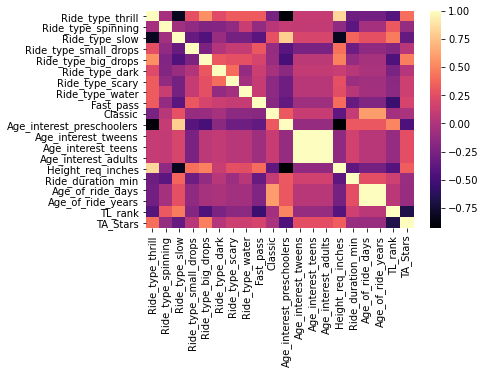

In [ ]:
sns.heatmap(df.corr(), cmap = 'magma', yticklabels = True);

In the heatmap above, we see some of the following:

**High Correlations**
* 1.0 (or visually equal) correlations for all the age interests, this is because so many of the rows are one value (Yes)
    * Although it may be wise to drop/remove these columns, I will keep them for now to see how they may affect machine learning models in the future, creating a separate dataset without these columns as an option to compare.
* Another 1.0 (or visually equal) is between the age of ride day and years: this is because these are the same value in different forms
  * I will choose one of these to drop (days, as it is harder to immediately understand)
* The next highest correlation is that of Ride_type_slow and age_interest)preschoolers
  * this suggests that preschoolers like slower rides (low-thrill)
* Next highest correlation is height requirements and thrill rides.
  * thrill rides often require higher height requirements, as they are not appropriate for small children for safety and enjoyment reasons

**Negative Correlations**
* negative correlation suggests inverse relationships
  * height requirements and ride_type slow: slower (low-thrill) rides have no or low height requirements
  * height requirements and interests of preschoolers are negative. preschoolers have shorter heights, therefore will only have interests in rides that have shorter height requirements, as that's the only ones they can go on!
  * the negative correlation between stars and rank is due to the fact that they ARE opposites
    * lower rank is the better outcome, where higher stars is better outcome; they are inversely proportional (expected)
  * thrill ride is negatively related to slow rides and preschoolers
    * slow rides are the opposite of thrill rides
    * preschoolers are too young to go on thrill rides

In [ ]:
#dropping days
df = df.drop(columns='Age_of_ride_days')
df.head()

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,0,1,all ages,1,1,1,1,0,1.50,1995-02-25,24.657084,24 years 7 months 27 days,43,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,1,0,0,0,0,0,0,0,1,0,"kids, tweens, teens, adults",0,1,1,1,44,5.00,2017-05-27,2.406571,2 years 4 months 28 days,9,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thrill, small drops",1,0,0,1,0,0,0,0,1,1,"kids, tweens, teens, adults",0,1,1,1,40,3.50,1980-09-23,39.080082,39 years 0 months 29 days,8,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,1,0,all ages,1,1,1,1,0,4.00,1998-10-07,21.043121,21 years 0 months 15 days,32,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",1,0,0,1,0,1,1,0,1,0,"kids, tweens, teens, adults",0,1,1,1,40,3.25,1998-04-22,21.503080,21 years 6 months 2 days,24,4.0


In [ ]:
#as promised, a subdataset which removes all remaining age_interest related columns
no_ages_df = df.drop(columns= ['Age_interest_preschoolers', 'Age_interest_tweens', 'Age_interest_teens', 'Age_interest_adults'])
no_ages_df.head()

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,0,1,all ages,0,1.50,1995-02-25,24.657084,24 years 7 months 27 days,43,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,1,0,0,0,0,0,0,0,1,0,"kids, tweens, teens, adults",44,5.00,2017-05-27,2.406571,2 years 4 months 28 days,9,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thrill, small drops",1,0,0,1,0,0,0,0,1,1,"kids, tweens, teens, adults",40,3.50,1980-09-23,39.080082,39 years 0 months 29 days,8,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,1,0,all ages,0,4.00,1998-10-07,21.043121,21 years 0 months 15 days,32,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",1,0,0,1,0,1,1,0,1,0,"kids, tweens, teens, adults",40,3.25,1998-04-22,21.503080,21 years 6 months 2 days,24,4.0


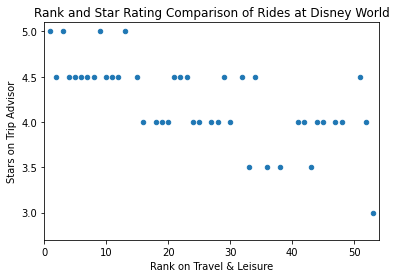

In [ ]:
#Visualization of this
df.plot.scatter(x='TL_rank', y = 'TA_Stars')
plt.xlim(0,54)
plt.xlabel('Rank on Travel & Leisure')
plt.ylabel('Stars on Trip Advisor')
plt.title('Rank and Star Rating Comparison of Rides at Disney World')
plt.ylim(2.7,5.1);
#As we can see, there is a negative trend, but the stars vary with rank, generally

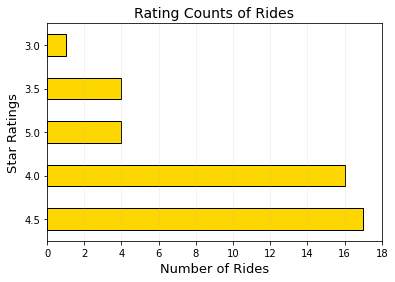

In [ ]:
#easier way to look at how many stars there are
df['TA_Stars'].value_counts().plot(kind = 'barh', edgecolor = 'black', color = 'gold')
plt.title('Rating Counts of Rides', fontsize = 14)
plt.ylabel('Star Ratings', fontsize = 13)
plt.xlabel('Number of Rides', fontsize = 13)
plt.xlim(0,18)
plt.grid(axis = 'x', alpha =0.2);

In [ ]:
#what rides have what stars
sv = df.groupby(['TA_Stars'])['Ride_name'].value_counts()
sv

TA_Stars  Ride_name                                     
3.0       Journey Into Imagination with Figment             1
3.5       Astro Orbiter                                     1
          Mission Space                                     1
          The Barnstormer                                   1
          Tomorrowland Speedway                             1
4.0       Dinosaur                                          1
          Frozen Ever After                                 1
          Gran Fiesta Tour Starring The Three Caballeros    1
          It's a Small World                                1
          Jungle Cruise                                     1
          Living with the Land                              1
          Mad Tea Party                                     1
          Na'vi River Journey                               1
          Peter Pan's Flight                                1
          Primeval Whirl                                    1
          The

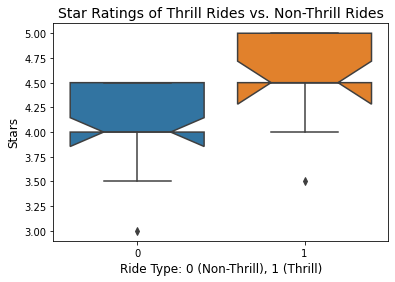

In [329]:
sns.boxplot(x = 'Ride_type_thrill', y='TA_Stars', data = df, notch = True)
plt.title('Star Ratings of Thrill Rides vs. Non-Thrill Rides', fontsize=14)
plt.xlabel('Ride Type: 0 (Non-Thrill), 1 (Thrill)', fontsize = 12)
plt.ylabel('Stars', fontsize = 12);

In [330]:
df.groupby(['Ride_type_thrill'])['TA_Stars'].describe()
#summary of boxplot in analog form

,count,mean,std,min,25%,50%,75%,max
Ride_type_thrill,,,,,,,,
0,29.0,4.103448,0.386821,3.0,4.0,4.0,4.5,4.5
1,13.0,4.500000,0.456435,3.5,4.5,4.5,5.0,5.0


Thrill rides are higher rated than non-thrill rides. (With one outlier in each category). The 25% and 50% are the same for both thrill and non-thrill rides. Non-thrill rides do not have a single 5.0 star attraction.